# **Project 2** Network Architecture Search and Expert Designed CNNs for Multi-target Concrete Crack Detection

## 1. General Review

In this project, we focus on the problem of bridge crack detection in [CODEBRIM](https://zenodo.org/record/2620293#.YcC-4LhKiNc) dataset for assessing the structural integrity in multi-target scenario. We compare two branches of convolutional neural networks (CNNs): expert-designed complex CNNs (e.g. [VGG](https://pytorch.org/hub/pytorch_vision_vgg/), [ResNet](https://pytorch.org/hub/pytorch_vision_resnet/), [AlexNet](https://pytorch.org/hub/pytorch_vision_alexnet/)) and automatically generated lightweight CNNs from network architecture search ([NAS](https://en.wikipedia.org/wiki/Neural_architecture_search)).




## 2. Model at a quick look

### 2.1 Load model
Run the cell below to get a primary impression of our model. We use **ZenNAS-1** as an example to show a fundamental workflow of our model. We first load model parameters from [local file](./hard_ZenNas_withPretrain.pth). 

In [18]:
# load trained model

from tools.ZenNas_example import *
%load_ext autoreload
%autoreload 2
paras_path = "./model_scripts/hard_ZenNas_withPretrain.pth"
class_num = 6
model = get_ZenNet_pretrained('zennet_imagenet1k_flops400M_SE_res224', num_classes=class_num)
paras = torch.load(paras_path, map_location=torch.device('cpu'))
model.load_state_dict(paras)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
---debug use_se in SuperResIDWE1K7(16,40,2,40,1)
---debug use_se in SuperResIDWE1K7(40,64,2,64,1)
---debug use_se in SuperResIDWE4K7(64,96,2,96,5)
---debug use_se in SuperResIDWE2K7(96,224,2,224,5)
loading pretrained parameters...


<All keys matched successfully>

### 2.2 Load test picture
Then load a random picture from [test set](./sample/defects) and have a glance at what our data is like. The picture has been preprocessed which means it was cropped and resized. You can change the parameter of function ***get_sample*** and choose either picture from [test set](./sample/defects) you want to test.

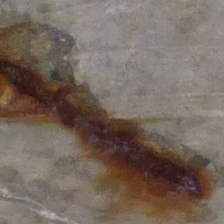

The ground truth is/are: 
Spallation
ExposedBars
CorrosionStain


In [19]:
# load test picture and label

# data, label= get_sample("./sample/defects/image_0000005_crop_0000001.png")
data, label= get_sample()

show_sample(data)
show_label(label)

### 2.3 Predict result
Feed the sample data into our model to get prediction

In [20]:
#predict the sort of concrete crack

import torch
import numpy as np
model.eval()
outputs = model(data)
outputs = torch.sigmoid(outputs)
show_label(np.round(outputs.detach().numpy()), is_test=True)
print("*"*25)
show_label(label)

The pridiction is/are: 
ExposedBars
CorrosionStain
*************************
The ground truth is/are: 
Spallation
ExposedBars
CorrosionStain


### 2.4 Attention display
We validate the performance gain using [Grad-CAM](http://gradcam.cloudcv.org/) to inspect attention pattern of last few convolutional layers.

In [21]:
#show the attention of our model
show_attenttion(model, data)
print("*"*25)
show_sample(data)



ModuleNotFoundError: No module named 'grad_cam'